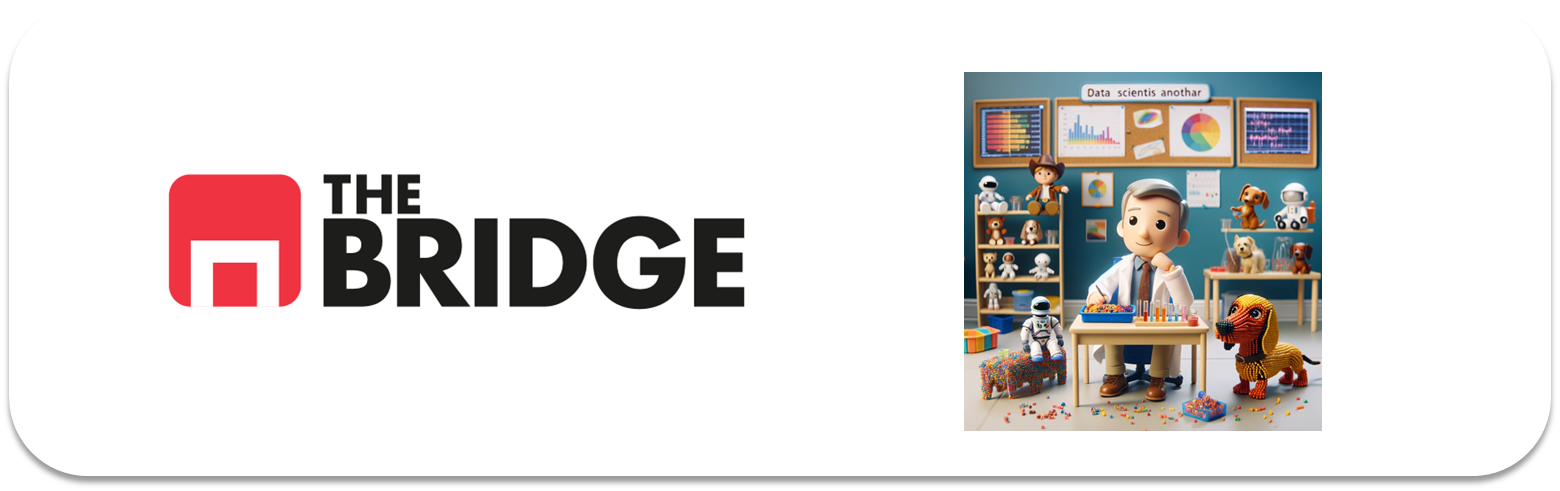

## PRACTICA OBLIGATORIA: **Análisis Univariante**

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import pandas as pd
import seaborn as sns

from bootcampviztools import pinta_distribucion_categoricas, plot_combined_graphs

pd.options.mode.copy_on_write = True # CoW por defecto a partir de pandas 3.0.0


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df_titanic = sns.load_dataset("titanic")

In [4]:
# Me hago mi backup y a trabajar
df = df_titanic.copy()

### #1.2

Muestra una porción del dataset y su info general. ¿Hay nulos?

In [5]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
# Podemos ver que hay nulos con el info() pero los contaremos con isna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.isna().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [8]:
# Obtenemos el porcentaje de nulos y los ordenamos de mayor a menor, además hacemos un slicing
(df.isna().sum() / len(df) * 100).round(2).sort_values(ascending=False)[:4]

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
dtype: float64

In [9]:
# Podemos guardar la información en un diccionario
dict_con_nulos = (df.isna().sum() / len(df) * 100).round(2).sort_values(ascending=False)[:4].to_dict()
dict_con_nulos

{'deck': 77.22, 'age': 19.87, 'embarked': 0.22, 'embark_town': 0.22}

*Empezamos decidiendo qué hacer con las categóricas con nulos explorándolas, la que más tiene es deck:*

In [10]:
df["deck"].value_counts(dropna=False, normalize=True) * 100

deck
NaN    77.216611
C       6.621773
B       5.274972
D       3.703704
E       3.591470
A       1.683502
F       1.459035
G       0.448934
Name: proportion, dtype: float64

***deck***:

- La variable tiene un 77.21% de nulos, por lo que hacer una imputación de la moda en este caso **no tendría sentido**.  

- Las tres estrategias posibles serían:
    - Debido a la cantidad de nulos podemos deshacernos de toda la columna -> OK
    - Podemos añadir una nueva categoría que sea "UNK" o Desconocido y mantener las categorías originales -> OK
    - De forma alternativa, podemos simplicar la columna en una nueva variable que sea "deck_known", es decir, conozco la cubierta en la que viaja el pasajero/a o no la conozco, pierdo algo de información pero mantengo la columna en este punto del proceso -> OK

- En las tres estrategías me deshago de los NaN que serán incompatibles con los algorítmos de ML -> Genial.

- En este caso opto por deshacerme de la columna, en otras sesiones probaremos los otros enfoques.

In [11]:
# Elimino deck y parch
df.drop(["deck","parch"], axis=1, inplace=True)

*Seguimos con embarked y embark_town, ya que también parecen categóricas:*

In [12]:
df["embarked"].value_counts(dropna=False)

embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [13]:
df["embark_town"].value_counts(dropna=False)

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64

*Ambas son la misma columna, una tiene iniciales y la otra los nombres de las ciudades enteros.*  

*Comprobemos si los nulos también coinciden:*

In [14]:
df.loc[df["embarked"].isna(), ["embarked", "embark_town"]]

,embarked,embark_town
61,NaN,NaN
829,NaN,NaN


Coinciden, por lo que hay que hacer algo con ellos.

Al ser muy poquitas instancias nulas podemos:
- Imputar la moda -> OK
- Eliminar las instancias, perdemos poca información. -> OK

En este caso optamos por imputar la moda, en otra ocasión quitaremos las filas.

In [15]:
embark_town_mode = df["embark_town"].mode()[0]
embarked_mode = df["embarked"].mode()[0]

In [16]:
df.loc[df["embark_town"].isna(), "embark_town"] = embark_town_mode
df.loc[df["embarked"].isna(), "embarked"] = embarked_mode

*Listo, vamos con la última columna con nulos, age, que es de tipo numérico:*

<Axes: >

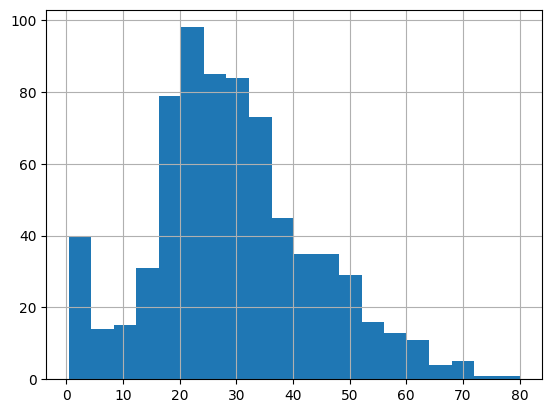

In [17]:
# Primero la exploro con histograma y valores estadísticos
df["age"].hist(bins=20)

In [18]:
df["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

Tiene una distribución casi-normal, la media parece verse afectada por los valores máximos que la arrastran un poquito, por lo que quizá la mediana sea mejor valor de representación de tendencia central.  

Pero OJO, tenemos una columna muy relacionada con la edad (y el sexo) que es "who" (género), así que sería sensato tenerla en cuenta:

In [19]:
# Media de edad por who
df.groupby(['who'], observed=False)['age'].mean()

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [20]:
# Mediana de edad por who
df.groupby(['who'], observed=False)['age'].median()

who
child     5.0
man      30.0
woman    30.0
Name: age, dtype: float64

Vemos que la mediana cambia un poco cuando tenemos en cuenta el género, y no tendría sentido imputar un valor de 28 o 30 años a un niño, ¿verdad? Por ello creamos una estrategia de imputación en base al género.

Por cierto, en casos como este puede ser interesante guardarnos qué datos eran nulos antes de la imputación :)  
Lo haremos usando isna():

In [21]:
# Columna con flags de imputación
df["age_imputed"] = df.age.isna()

In [22]:
# Imputo el valor por who en age:

# Máscaras por género
is_woman = df.who == "woman"
is_child = df.who == "child"
is_man = df.who == "man"

# Valores medianos
mediana_woman = df.loc[is_woman,"age"].median()
mediana_child = df.loc[is_child,"age"].median() # No hay chiquillos nulos, pero por si acaso...
mediana_man = df.loc[is_man,"age"].median()

# Imputamos
df.loc[is_woman & df["age_imputed"], "age"] = mediana_woman
df.loc[is_child & df["age_imputed"], "age"] = mediana_child
df.loc[is_man & df["age_imputed"], "age"] = mediana_man

*Ahora podemos ver cómo cambia la distribución con valores imputados y sin ellos*

<Axes: >

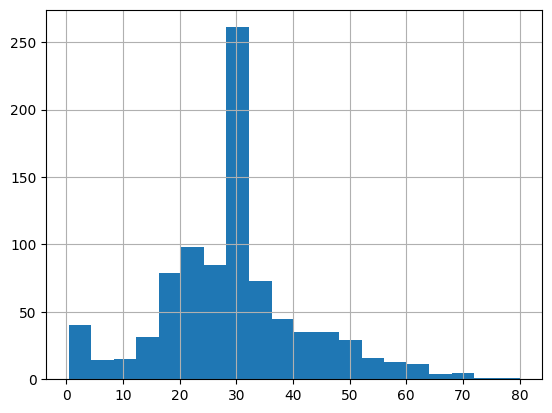

In [ ]:
# Con valores imputados se observa como se dispara el valor de 30 años
df["age"].hist(bins=20)

<Axes: >

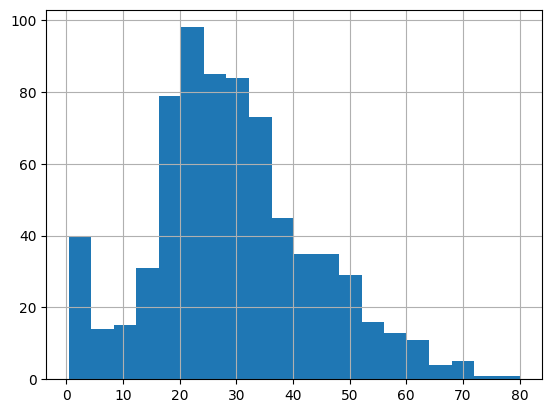

In [25]:
# Pero podemos mantener el acceso a la distribución original, genial :)
df.loc[~df["age_imputed"], "age"].hist(bins=20)

*Comprobamos si hemos limpiados todos los nulos:*

In [26]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
age_imputed    0
dtype: int64

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con el pasajero indicado en el manifiesto (lista de pasajeros)
* embarked: Es la inicial de la ciudad donde embarcó el pasajero.



| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived         | Indica si el pasajero sobrevivió (1) o no (0) |
| pclass           | Clase del pasaje (1ª, 2ª, 3ª) |
| sex              | Género del pasajero |
| age              | Edad del pasajero |
| sibsp            | Es el numero de familiares que viajan con el pasajero indicado en el manifiesto (lista de pasajeros) |
| parch            | Número de padres/hijos a bordo |
| fare             | Tarifa pagada por el pasajero |
| embarked         | Es la inicial de la ciudad donde embarcó el pasajero (C = Cherbourg, Q = Queenstown, S = Southampton) |
| class            | Clase del pasaje como categoría (Primera, Segunda, Tercera) |
| who              | Categoría del pasajero (hombre, mujer, niño) |
| adult_male       | Booleano que indica si el pasajero es un hombre adulto |
| deck             | Cubierta del barco donde se alojaba el pasajero |
| embark_town      | Ciudad de embarque: Cherbourg, Queenstown, Southampton  |
| alive            | Indica si el pasajero está vivo ('yes') o muerto ('no') |
| alone            | Booleano que indica si el pasajero viajaba solo |


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [ ]:
# No hace falta, ya lo tenemos hecho en la columna embarked :)

In [27]:
df["embarked"].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje, haz un análisis univariante completo y ordenado de las siguientes variables:  

["alive","who","age","fare","class","embarked","alone"]  

Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [29]:
# Creo una lista con las variables sugeridas y añado sex
lista_variables = ["alive","who","age","fare","class","embarked","alone","sex"]

*Para poder dividir adecuadamente entre categóricas y numéricas debo **tipificarlas**, para ello me puedo ayudar de una función como la siguiente:*

In [30]:
# Primero dividir las variables por tipo, usando la función que programamos en los ejercicios
def card_tipo(df, umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [31]:
# La aplico sobre la vista de las variables seleccionadas para análisis
df_tipo = card_tipo(df[lista_variables], 10, 25)
df_tipo

,Card,%_Card,Tipo,tipo_sugerido
alive,2,0.224467,object,Binaria
who,3,0.3367,object,Categorica
age,88,9.876543,float64,Numerica discreta
fare,248,27.833895,float64,Numerica continua
class,3,0.3367,category,Categorica
embarked,3,0.3367,object,Categorica
alone,2,0.224467,bool,Binaria
sex,2,0.224467,object,Binaria


In [32]:
# Separo en categóricas y numéricas (a mano)

categoricas = ["alive", "who", "class", "embarked", "alone", "sex"]
numericas = ["age", "fare"]

In [33]:
# Separo en categóricas y numéricas (con pandas)

categoricas = df[lista_variables].columns[df_tipo["tipo_sugerido"].isin(["Binaria","Categorica"])].to_list()
numericas = df[lista_variables].columns[df_tipo["tipo_sugerido"].isin(["Numerica discreta","Numerica continua"])].to_list()

In [34]:
print(f"Variables categóricas: {categoricas}")
print(f"Variables numéricas: {numericas}")


Variables categóricas: ['alive', 'who', 'class', 'embarked', 'alone', 'sex']
Variables numéricas: ['age', 'fare']


### #2.1 Categóricas

In [35]:
# Empezamos por el análisis frecuencial absoluto utilizando las funciones ya presentadas en el workout

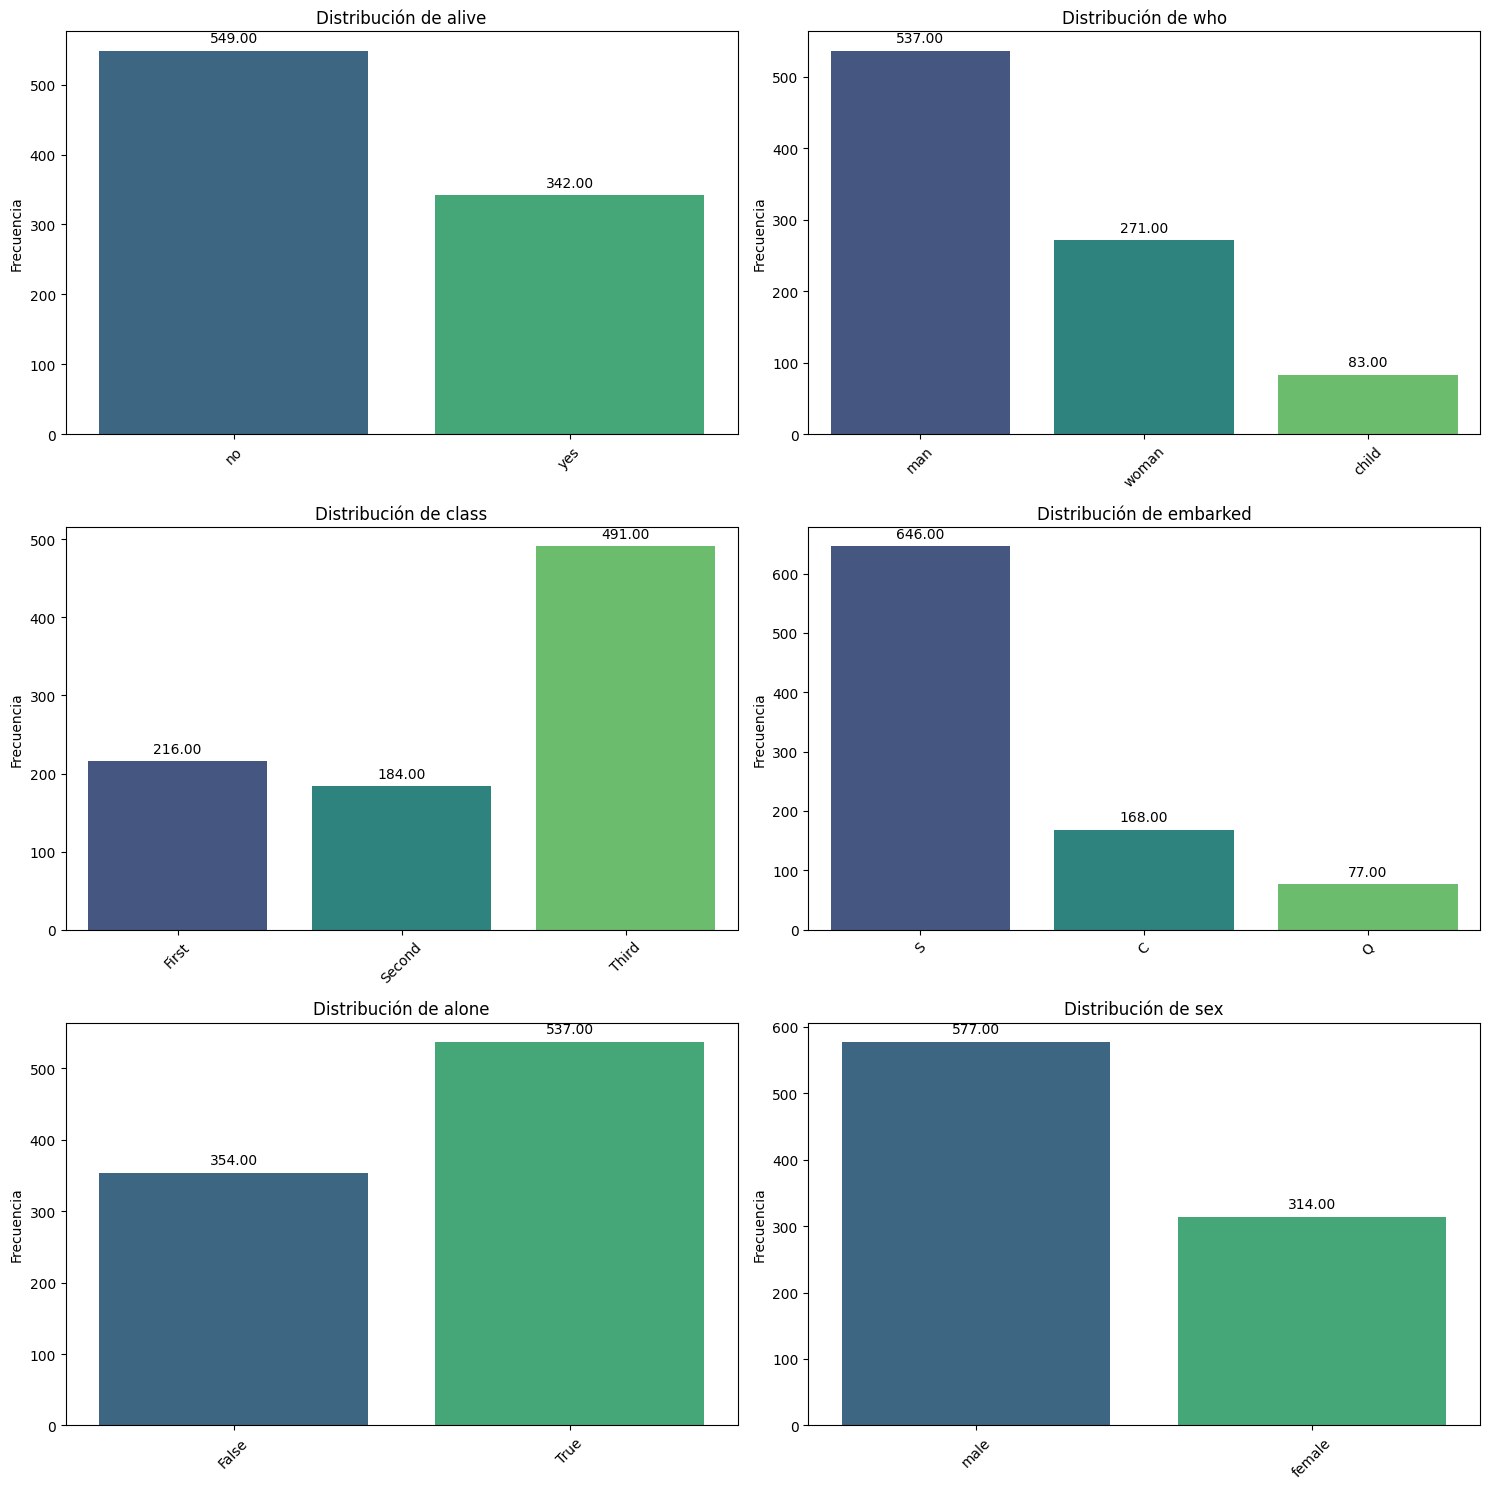

In [36]:
pinta_distribucion_categoricas(df, categoricas, mostrar_valores= True)

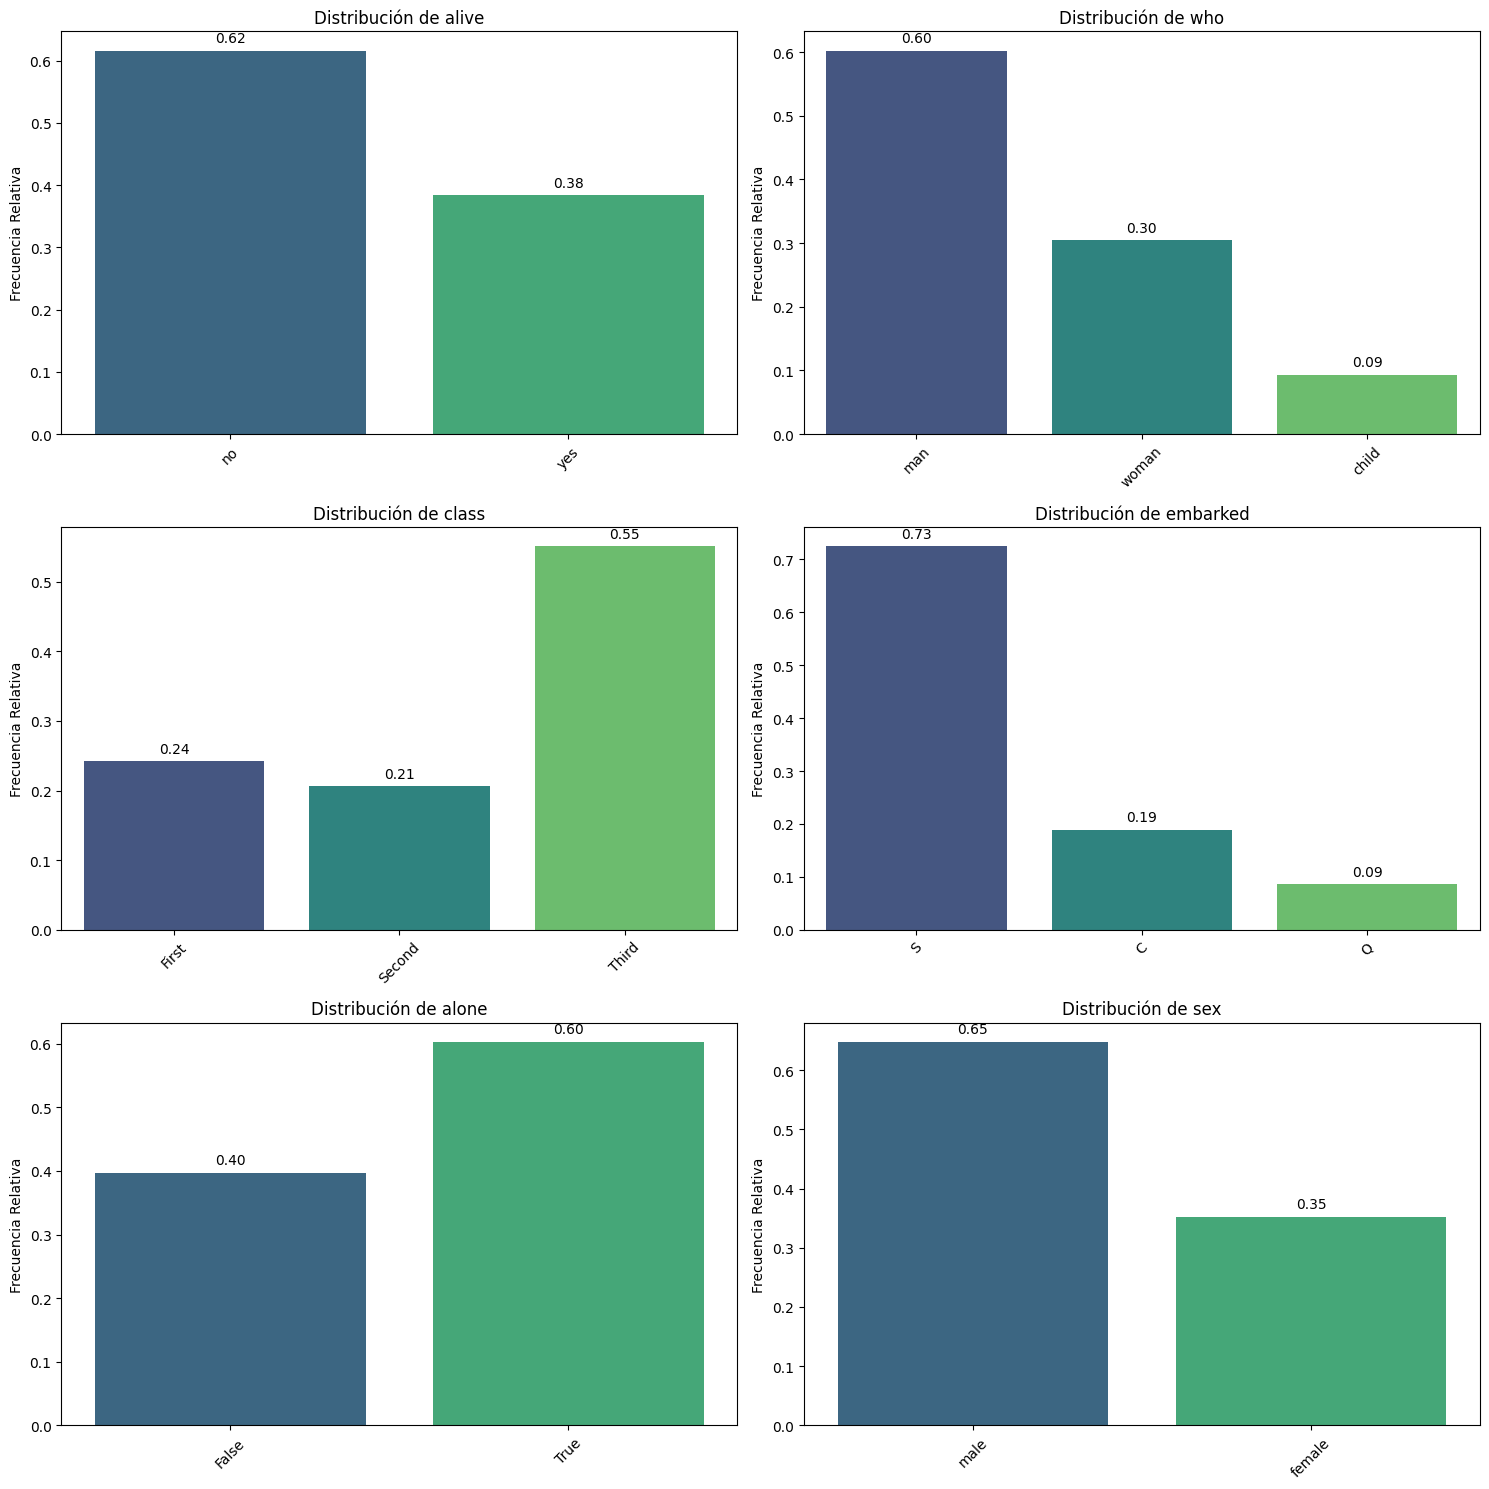

In [37]:
# Analizamos sus frecuencias relativas:

pinta_distribucion_categoricas(df, categoricas, relativa=True, mostrar_valores= True)

#### ***Análisis Univariante Categóricas***:

***survived***:
- Según estos valores el ratio de supervivencia fue casi la mitad que el de mortalidad (38% a 62%). Este dato concuerda con la sensación de que fue un accidente con un alto índice de mortalidad. Estaría bien, si el tiempo lo permite, contrastar con otros datos similares de la época.

***who***
- Esta variable muestra la distinción entre adultos (mujeres y hombres) y niños. Claramente me la apunto para hacer una bivariante con *survived* para saber como se distribuyeron esas muertes y si se mantuvo el patrón (62-38)

***class***
- Habiendo visto la película, estas frecuencias nos pareceran más que normales, claramente había mucho más pasaje de tercera (55%) que de segunda (21%) y de primera (24%). Curiosamente había más de primera que de segunda (por lo menos en este dataset) (Estos curiosamete me los guardo como mensajes de poca prioridad o para dar colorido)

***embarked***
- Por ahora sólo podemos decir que embarcaron principamente en Southampton (72%), un cierto número en Cherboroug (19%) y ya menos en Queenstown (9%).

***alone***
- Según esta variable eran más los pasajeros que viajaban sólos (60%) que los que no (40%), ¿fue un handicap viajar sólo?

***sex***
- Viajaron más hombres que mujeres (65%-35%), y lo interesante vendrá cuando crucemos esta variable con survived o con alive y con who.

#### *Todas las seleccionadas parecen interesantes para hacer un estudio bivariante y multivariante con la variable objetivo **survived/alive**.*

### #2.2 Numéricas

*Empezamos por sus valores estadísticos:*

In [107]:
# Valores estadísticos
df[numericas].describe()

,age,fare
count,891.000000,891.000000
mean,29.758889,32.204208
std,13.002570,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,30.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [109]:
(31 - 7.9104) * 1.5

34.6344

*Calculamos sus ICR y CV:*

#### Rango intercuartílico de las variables (IQR)

***age***

>IQR = Q3 - Q1 = 35 - 22 = 13
>
>1.5 * IQR = 1.5 * 13 = 19.5
>
>maximum = min(Q3 + 1.5*IQR, max) = min(35 + 19.5, 80) = 54.5
>
>minimum = max(Q1 - 1.5*IQR, min) = max(22 - 19.5, 0.42) = 2.5

***fare***

>IQR = Q3 - Q1 = 31 - 7.9104 = 23.0896
>
>1.5 * IQR = 1.5 * 23.0896 = 34.6344
>
>maximum = min(Q3 + 1.5*IQR, max) = min(31 + 34.6344, 512.3292) = 54.5
>
>minimum = max(Q1 - 1.5*IQR, min) = max(7.9104 - 34.6344, 0) = 2.5


#### Coeficiente de variacion (CV)

Más info: [Wikipedia](https://es.wikipedia.org/wiki/Coeficiente_de_variaci%C3%B3n)

In [38]:
# Obtenemos sus CV con una función

def get_CV(df, columna):
    columna = [columna] if isinstance(columna, str) else columna
    desc = df[columna].describe().T
    return desc["std"] / desc["mean"] * 100

In [39]:
# Le puedo pasar a la función una lista o un string (columna a columna)

get_CV(df, numericas)
# get_CV(df,"age")
# get_CV(df,"fare")


age      43.693063
fare    154.307253
dtype: float64

Estos coeficientes de variación indican dispersión muy diferente en cada variable:

***age: 43.69%***
- Dispersión moderada
- Es razonable para edades: hay bebés, adultos y ancianos en el Titanic
- Los datos **no son homogeneos**, pero están relativamente concentrados alrededor de la media

***fare: 154.31%***

- Dispersión muy alta (más del 100%)
- Significa que la desviación estándar es mayor que la media.
- Indica datos **muy heterogéneos**: probablemente había tarifas muy baratas (3ª clase) y muy caras (1ª clase, suites de lujo)
- Puede haber outliers importantes

(2, 2)


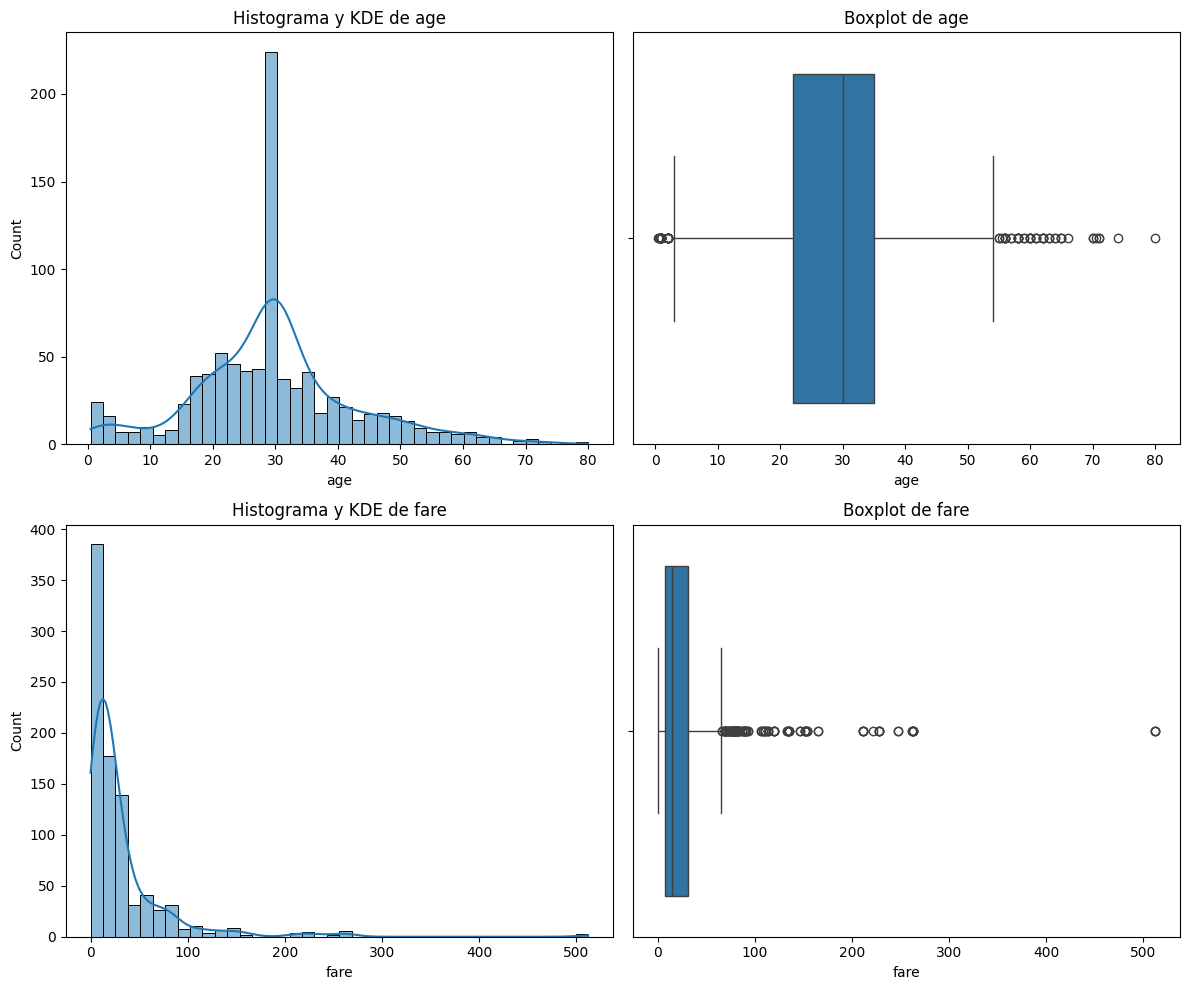

In [40]:
# Finalmente, ploteamos histogramas y diágramas de caja

plot_combined_graphs(df, numericas, whisker_width=1.5, bins = 40)

(2, 2)


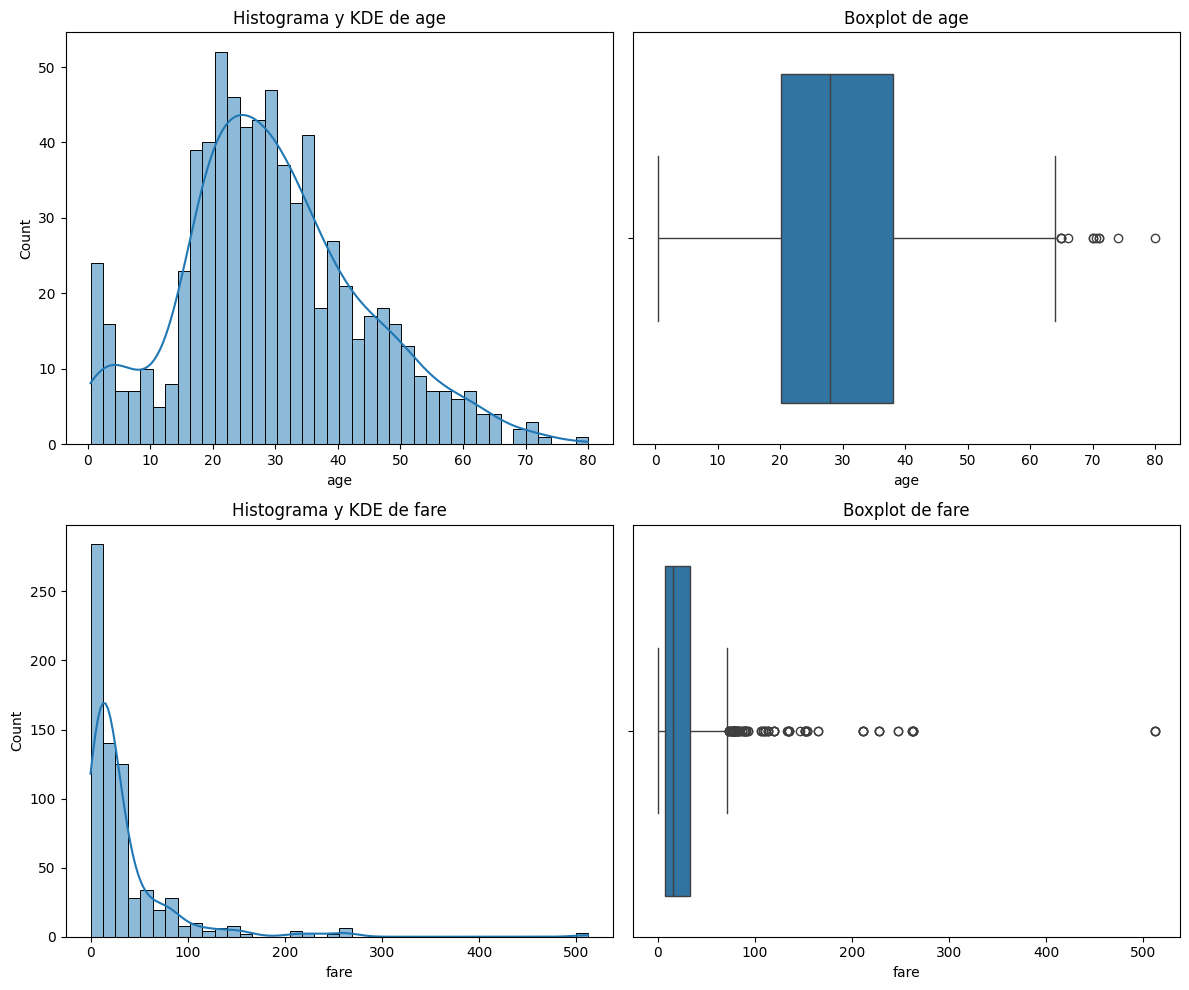

In [41]:
# ¿Qué pasa si quitamos los nulos imputados en age?

plot_combined_graphs(df[~df["age_imputed"]], numericas, whisker_width=1.5, bins = 40)

#### ***Análisis Univariante Numéricas***:

***age***:
- Presenta una bonita gráfica casi-normal, que habla de simetría, buena representación por las tendencias centrales (quizá nuevamente mejor la mediana que la media, aunque están cercanas) aunque haya cierta dispersión (CV > 30%). Presenta posibles outliers por encima y por debajo (pero en este caso serán los bebés y los adultos mayores). Por apuntar valores (media: 32, mediana: 30). Cómo ya sé que existe la variable "who", me apunto un análisis interesante que puede ser "age"/"who", y por supuesto "age"/"class". En general "age" se presta interesante para entender mejor el pasaje y luego relacionarlo multivariantemente con "survived".

***fare***:
* El precio del ticket presenta una curva de distribución completamente diferente, como casi era de esperar y que si lo ligamos a otras observaciones como el customer_lifetime_value, puede que sea bastente características de precios, ingresos, gastos en servicios, etc. Es una distribución con concentración (el tamaño de la caja es reducido) y larga cola (como se puede ver en la existencia de bastantes valores que podrían ser considerados outliers). La media parece poco representativa y optaríamos por la mediana como un valor más representativo (de 32 a 14 ¿libras?) pero sin duda será interesante quizá tratar esta variable como una posible para hacer *binnig* y relacionarla con class, que igual ya nos ahorra ese *binning* y la necesidad incluso de usar esta columna.